<h1 align="center"> Loan Prediction Notebook </h1>
<h2 align="right"> Done By : Wissem Bellara </h2>

<h3>I. Business Understanding </h3>

Our Objective is to train a model based on values of features (columns) and to predict whether we should give a loan or not. 
This is a binary classification problem (Supervised Learning).   

<h3>II. Data Understanding </h3>

<h4> 1. Data Collection </h4>

In [1]:
import numpy as np #Import Numpy
import pandas as pd #Import Pandas for dealing with dataframes
import seaborn as sns #Import Seaborn for visualisations
import matplotlib.pyplot as plt #Import Pyplot for visualisations
import missingno as msno #Import missingno to show missing values

In [2]:
train=pd.read_csv("train_u6lujuX_CVtuZ9i.csv") #Read the training data as train
test=pd.read_csv("test_Y3wMUE5_7gLdaTN.csv") #Read the test data as test

<h4> 2. Data Description </h4>

In [3]:
train.head() #Show the first 5 lines

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
train.shape #Number of instances and number of columns

(614, 13)

In the training dataset, we have 614 instances (lines) and 13 columns.  <br>
The : <ol>
    <li> Loan_ID column : indicates a Loan_ID </li>
    <li> Gender column : binary : Male or Female </li>
    <li>Married columm : indicates whether the applicant is married or not</li>
    <li>Dependents column : has the number of dependents</li>
    <li>Education column : tells whether a person has graduated or not</li>
    <li>Self_Employed column : Self_Employed or not</li>
    <li>ApplicantIncome column : indicates the applicant salary</li>
    <li>CoapplicantIncome column :  indicates the coapplicant salary </li>
    <li>LoanAmount column :  indicates the amount of the loan</li>
    <li>Loan_Amount_Term column :  indicates the number of days for the loan</li>
    <li>Credit_History column :  tells whether the applicant has a credit history or not</li>
    <li>Property_Area column :  tells where the applicant lives</li>
    <li>Loan_Status column :  tells if the loan was accepted or not</li>
    </ol>

<h4> 3. Data Exploration </h4>

In [5]:
train.info() #Types of Columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In our dataset, we have 13 columns, <br>
8 of which are of type object<br>
4 of which are of type float<br>
1 of which are of type int<br>
Some columns have null values such as "LoanAmount" which has 592 / 614 non-null values

In [6]:
train.describe() #Shows descriptive statistics summary of numerical columns in the dataset

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


There are 5 Numerical columns in our dataset which are : 
<ol>
    <li>Applicant Income : the values range between 150 and 81000 with a mean value of 5403 </li>
    <li>CoApplicant Income : the values range between 0 and 41667 with a mean value of 1621 </li>
    <li>LoanAmount : the values range between 9 and 700 with a mean value of 146 </li>
    <li>Loan_Amount_Term : the values range between 12 and 480 with a mean value of 342 </li>
    <li>Credit_History : the values are whether 0 and 1 </li>

Univariate Visualisations

<AxesSubplot: xlabel='Loan_Status', ylabel='count'>

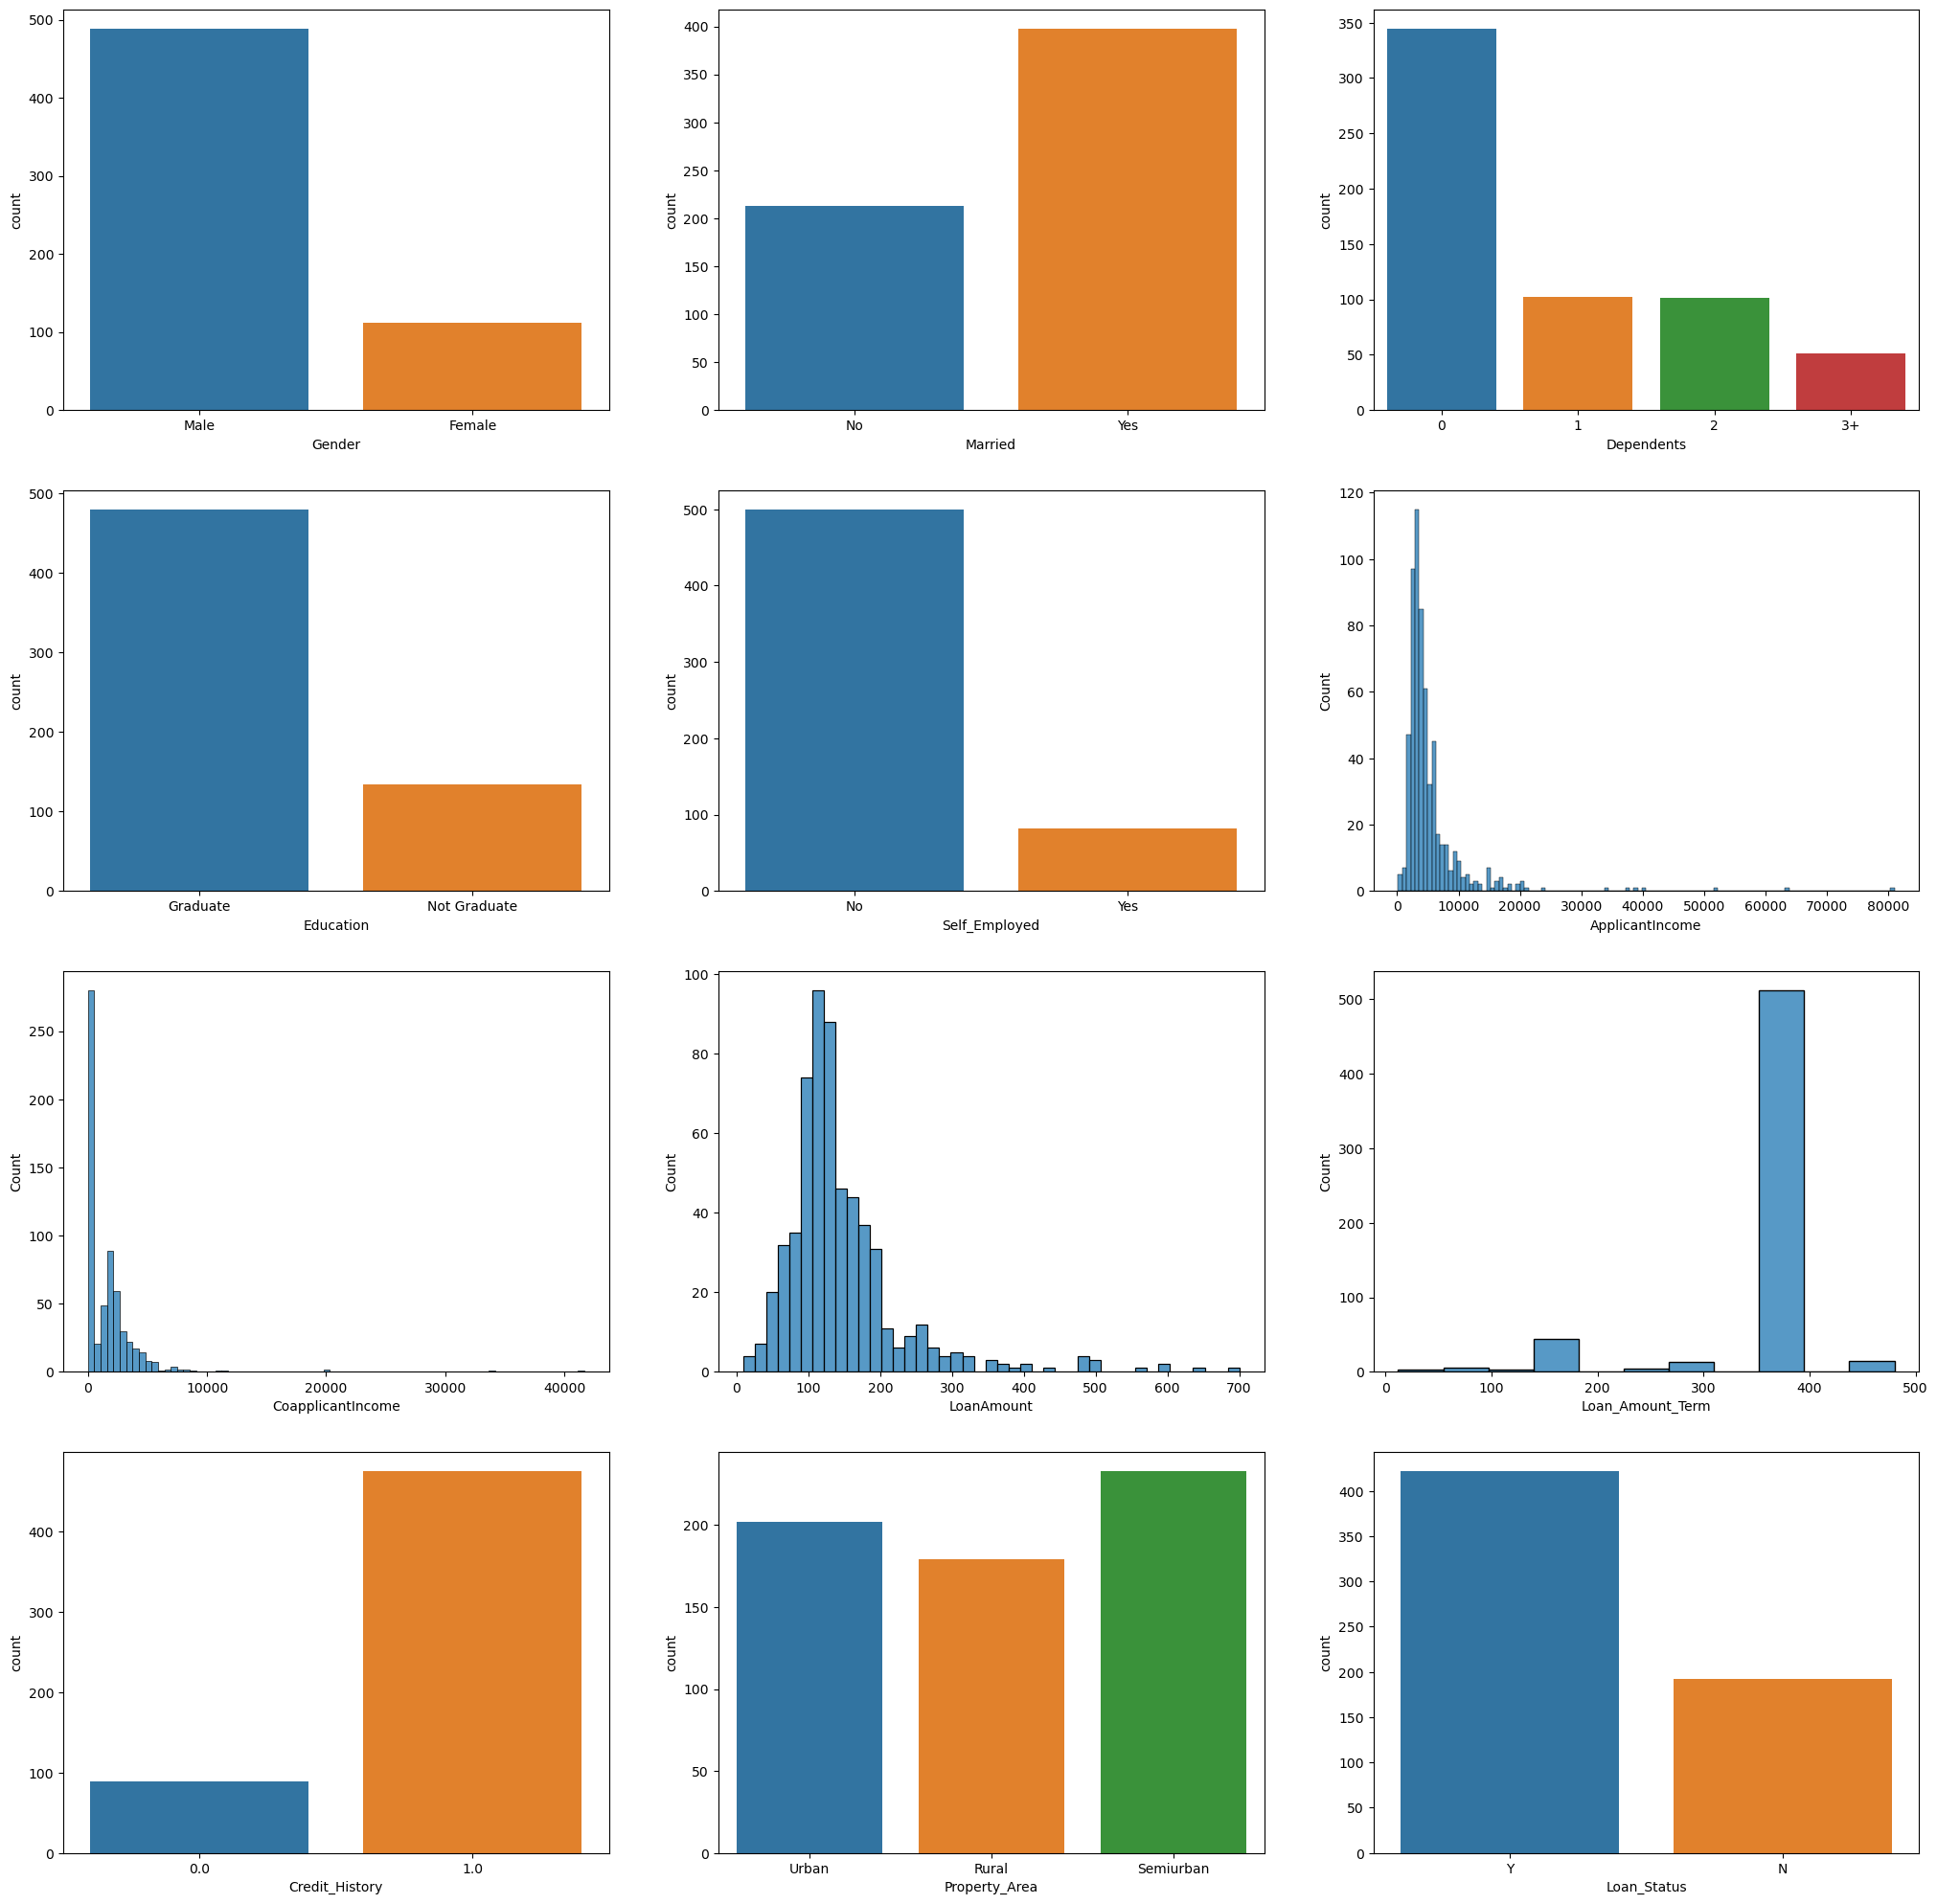

In [7]:
f,axes = plt.subplots(4,3,figsize=(25,25))
sns.countplot(data=train,x="Gender",orient='v' , ax=axes[0][0])
sns.countplot(data=train,x="Married", orient='v' , ax=axes[0][1])
sns.countplot(data=train,x="Dependents", orient='v' , ax=axes[0][2])
sns.countplot(data=train,x="Education", orient='v' , ax=axes[1][0])
sns.countplot(data=train,x="Self_Employed", orient='v' , ax=axes[1][1])
sns.histplot(train,x="ApplicantIncome", ax=axes[1][2])
sns.histplot(train,x="CoapplicantIncome", ax=axes[2][0])
sns.histplot(train,x="LoanAmount" , ax=axes[2][1])
sns.histplot(train,x="Loan_Amount_Term" ,  ax=axes[2][2])
sns.countplot(train,x="Credit_History" , orient='v', ax=axes[3][0])
sns.countplot(train,x="Property_Area" , orient='v' , ax=axes[3][1])
sns.countplot(train,x="Loan_Status" , orient='v' , ax=axes[3][2])

In [8]:
#g=sns.countplot(data=train,x="Gender")
#g=sns.countplot(data=train,x="Married")
#g=sns.countplot(data=train,x="Dependents")
#g=sns.countplot(data=train,x="Education")
#g=sns.countplot(data=train,x="Self_Employed")
#sns.displot(train,x="ApplicantIncome")
#sns.displot(train,x="CoapplicantIncome")
#sns.displot(train,x="LoanAmount")
#sns.displot(train,x="Loan_Amount_Term")
#sns.countplot(train,x="Credit_History")
#sns.countplot(train,x="Property_Area")

Bivariate Visualisations

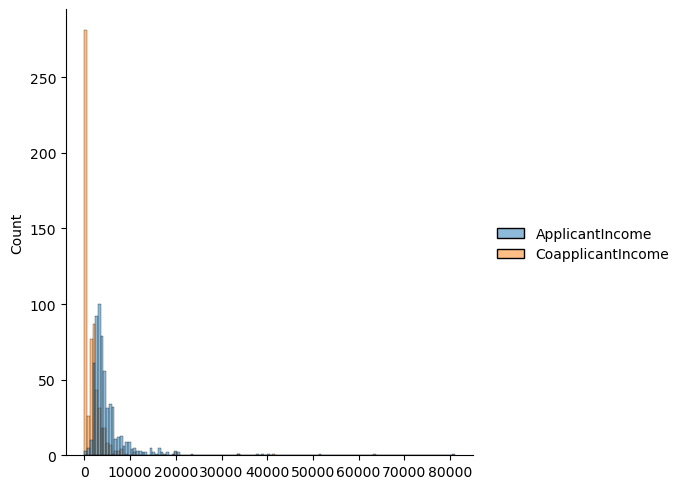

In [9]:
g=sns.displot(train[["ApplicantIncome","CoapplicantIncome"]])

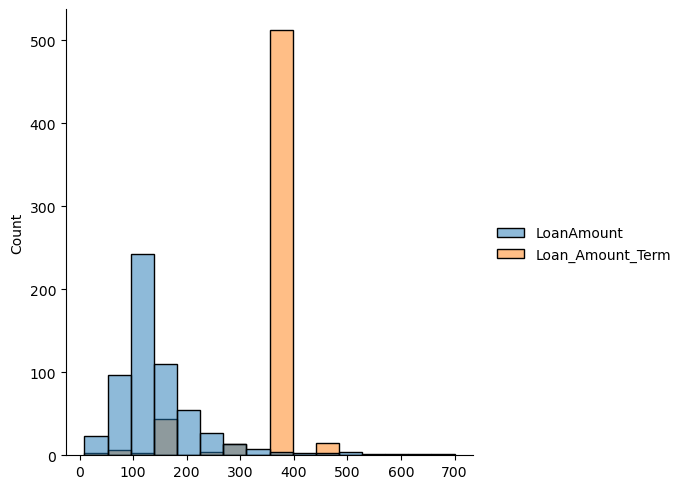

In [10]:
g=sns.displot(train[["LoanAmount","Loan_Amount_Term"]])

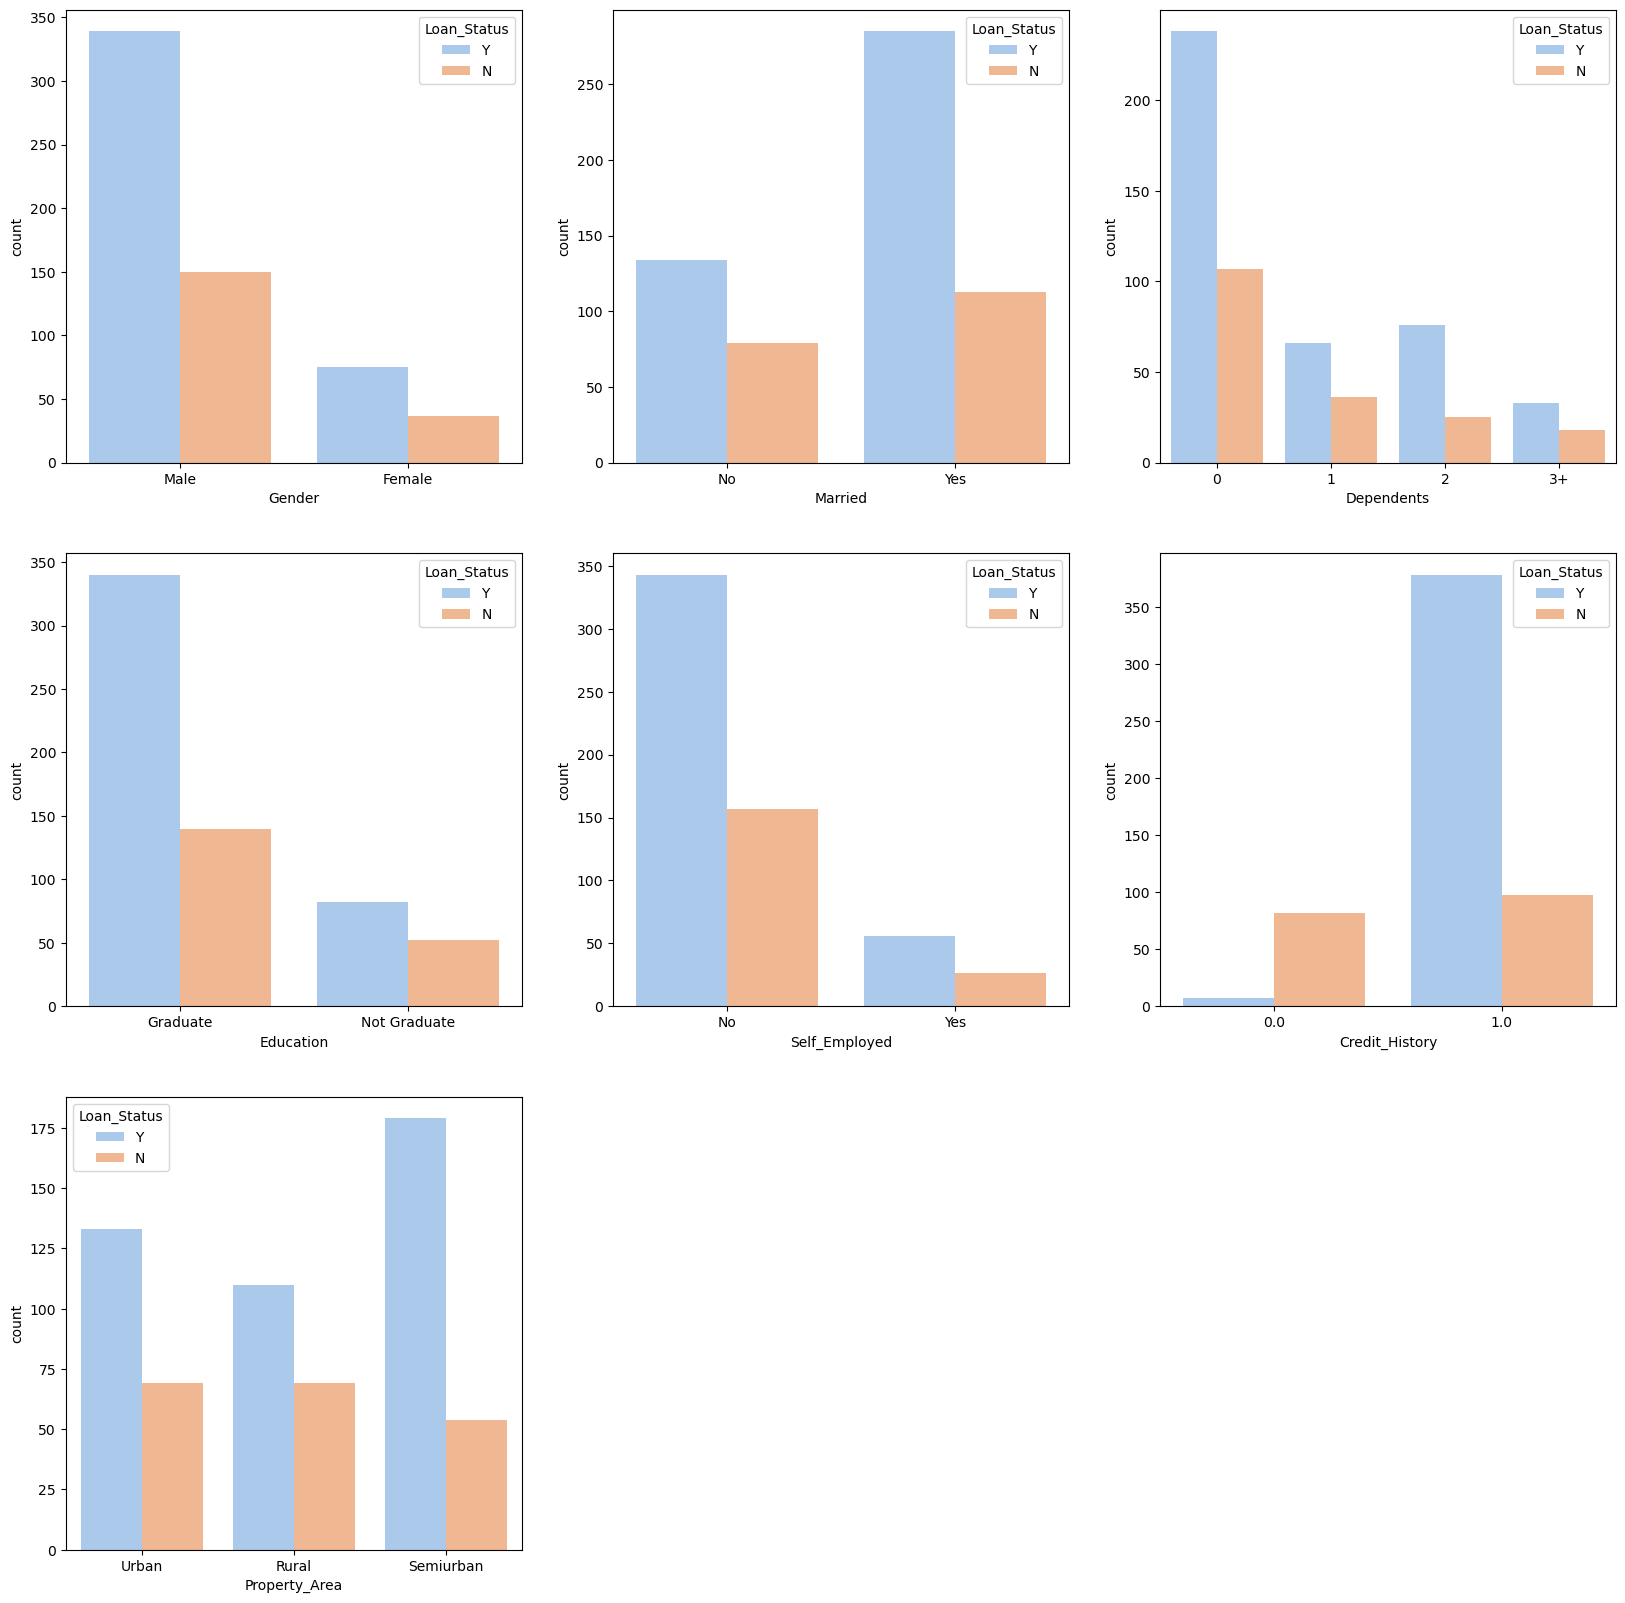

In [11]:
f, axes = plt.subplots(3,3,figsize=(20,20))
sns.countplot(train,x="Gender",hue="Loan_Status",palette="pastel",ax=axes[0][0])
sns.countplot(train,x="Married",hue="Loan_Status",palette="pastel",ax=axes[0][1])
sns.countplot(train,x="Dependents",hue="Loan_Status",palette="pastel",ax=axes[0][2])
sns.countplot(train,x="Education",hue="Loan_Status",palette="pastel",ax=axes[1][0])
sns.countplot(train,x="Self_Employed",hue="Loan_Status",palette="pastel",ax=axes[1][1])
sns.countplot(train,x="Credit_History",hue="Loan_Status",palette="pastel",ax=axes[1][2])
sns.countplot(train,x="Property_Area",hue="Loan_Status",palette="pastel",ax=axes[2][0])
f.delaxes(axes[2][1])
f.delaxes(axes[2][2])

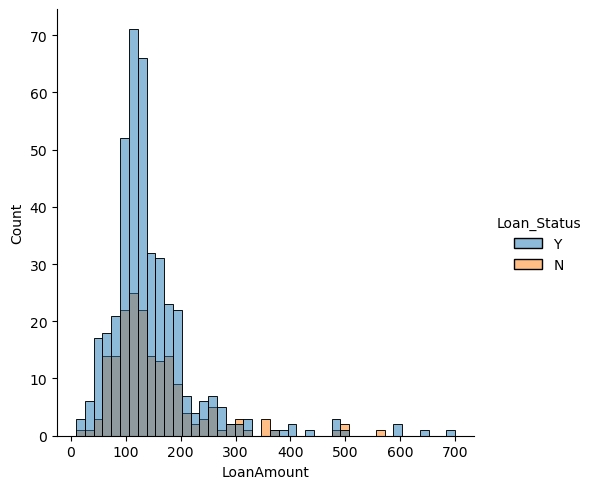

In [12]:
sns.displot(train,x="LoanAmount",hue="Loan_Status")

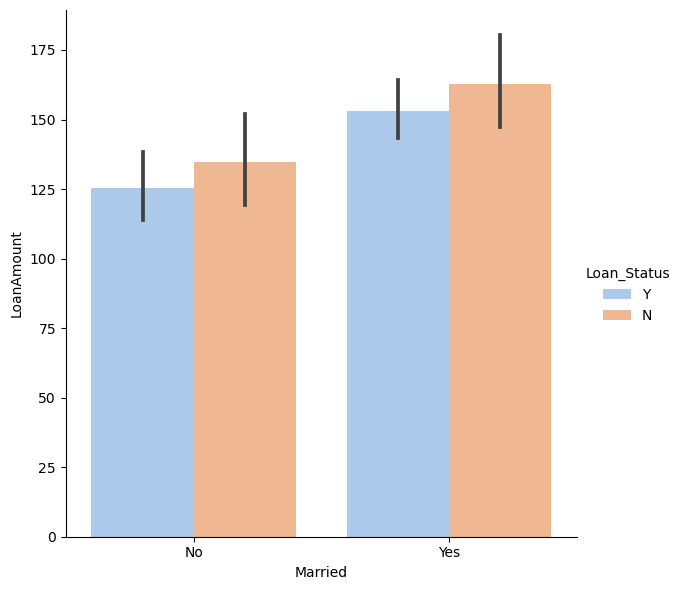

In [13]:

g=sns.catplot(data=train,kind="bar",x="Married",y="LoanAmount",hue="Loan_Status",\
              palette="pastel",height=6)

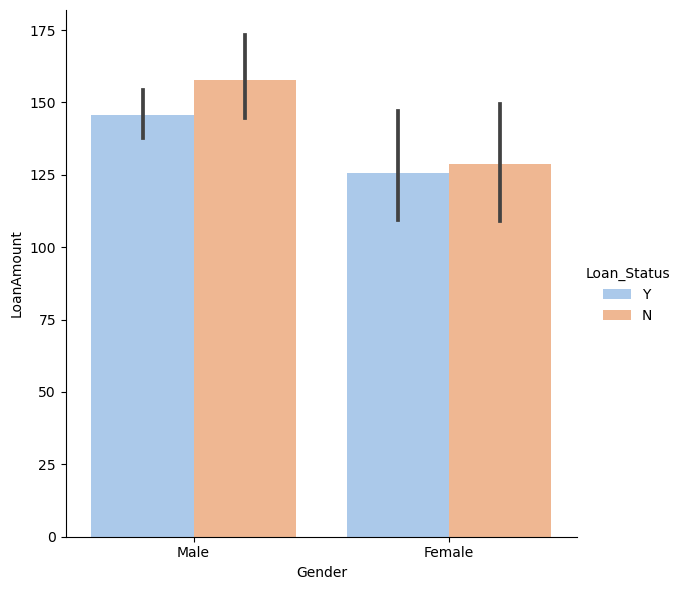

In [14]:
g=sns.catplot(data=train,kind="bar",x="Gender",y="LoanAmount",hue="Loan_Status",\
              palette="pastel",height=6)

Correlation Visualisations

C:\Users\WessB\AppData\Local\Temp\ipykernel_4100\1536600390.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train.corr().round(2)


<AxesSubplot: >

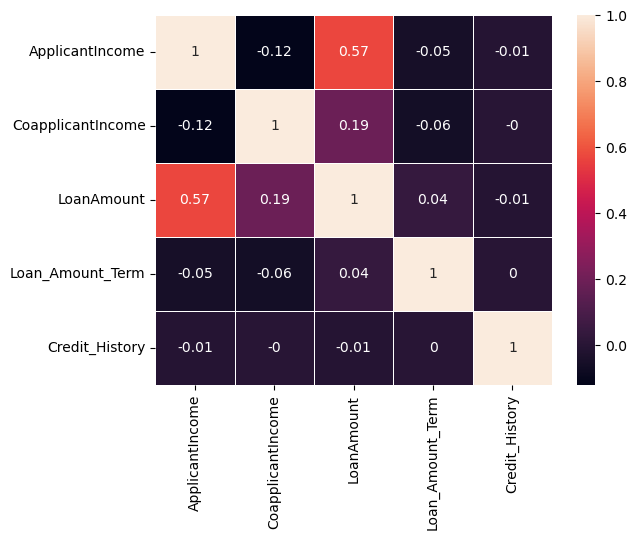

In [15]:
corr = train.corr().round(2)
sns.heatmap(corr, annot = True, linewidths= 0.7)

<h4> 4. Data Quality Identification </h4>

In [16]:
train.isnull().sum()[train.isnull().sum() > 0] #Show columns which have more than 0 null values

Gender              13
Married              3
Dependents          15
Self_Employed       32
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
dtype: int64

We have 7 columns which have empty values which are 
<ol>
<li>Gender          with    13 empty values </li>
<li>Married         with     3 empty values </li>
<li>Dependents      with    15 empty values </li>
<li>Self_Employed   with    32 empty values </li>
<li>LoanAmount      with    22 empty values </li>
<li>Loan_Amount_Term with    14 empty values </li>
<li>Credit_History  with    50 empty values </li>

<AxesSubplot: >

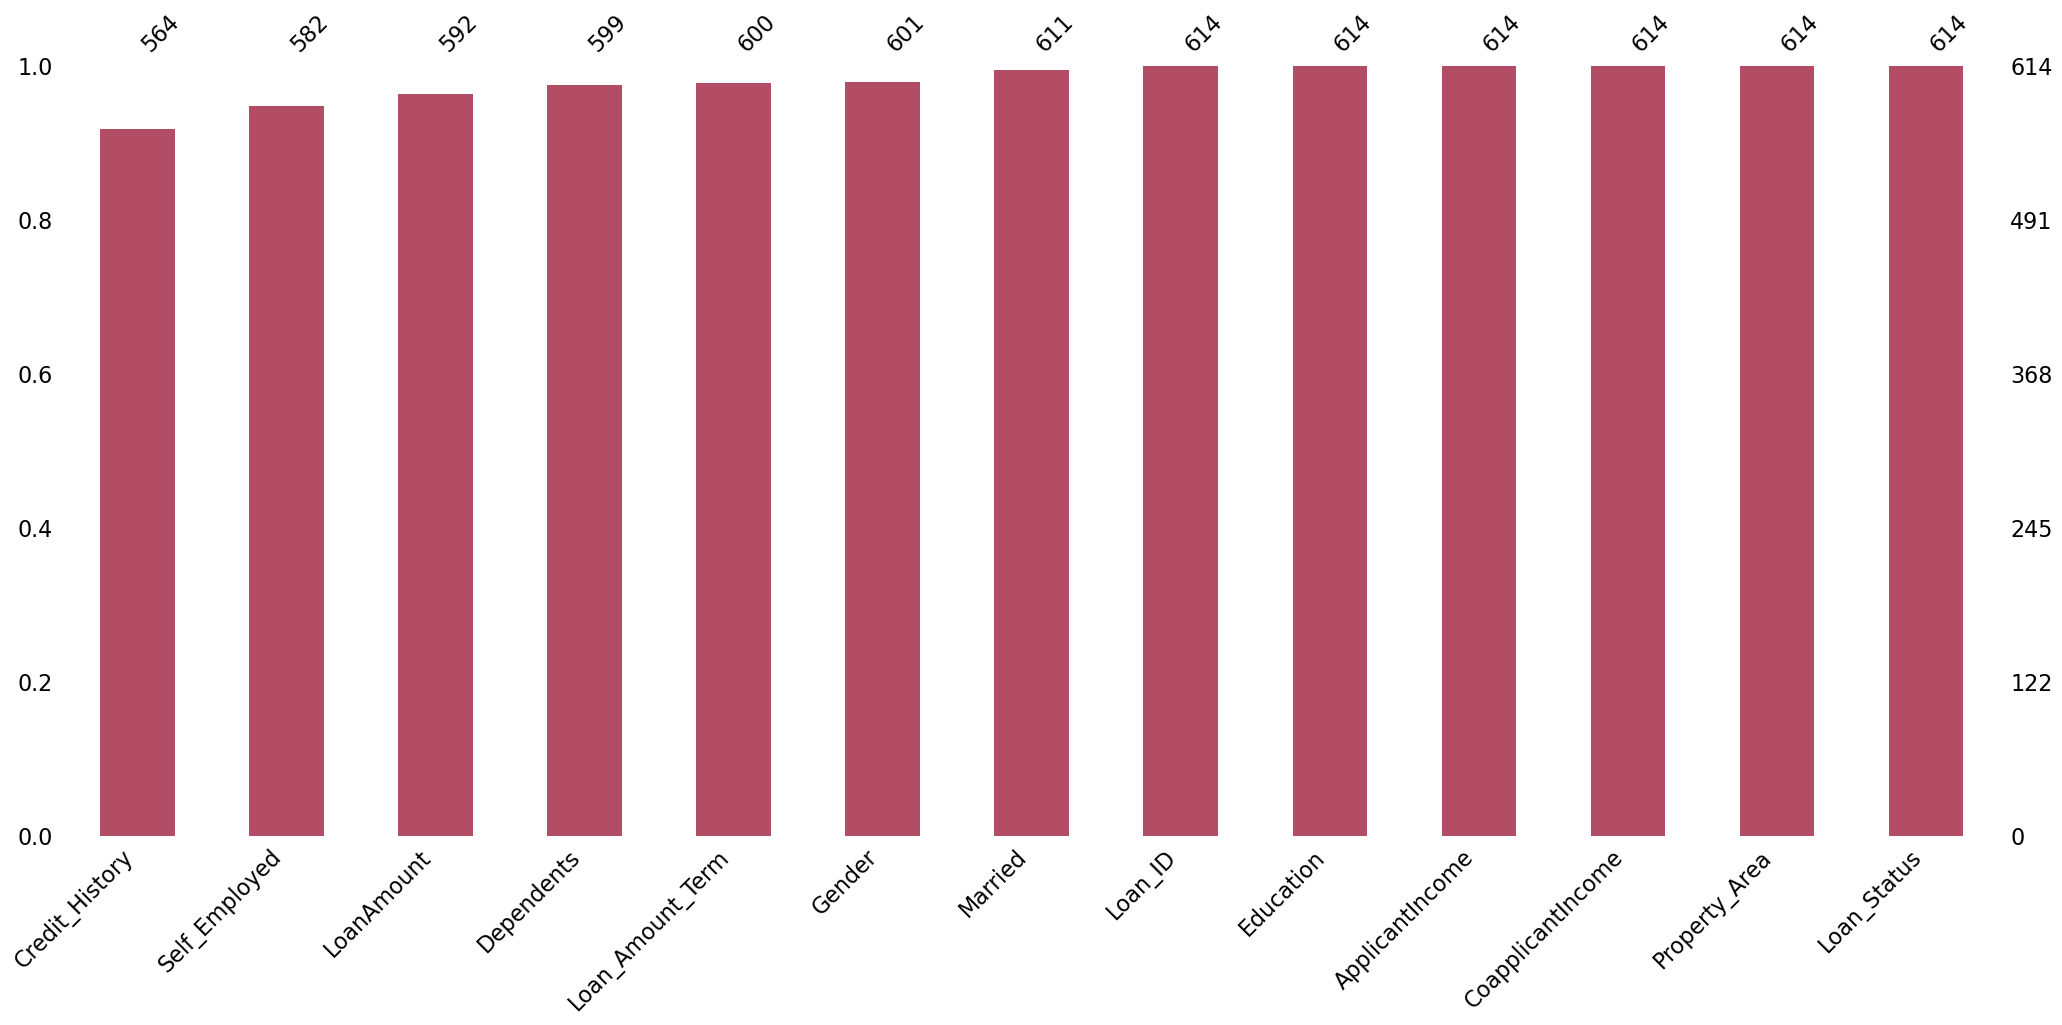

In [17]:
msno.bar(train,color=(0.7,0.3,0.4),sort="ascending")

<AxesSubplot: >

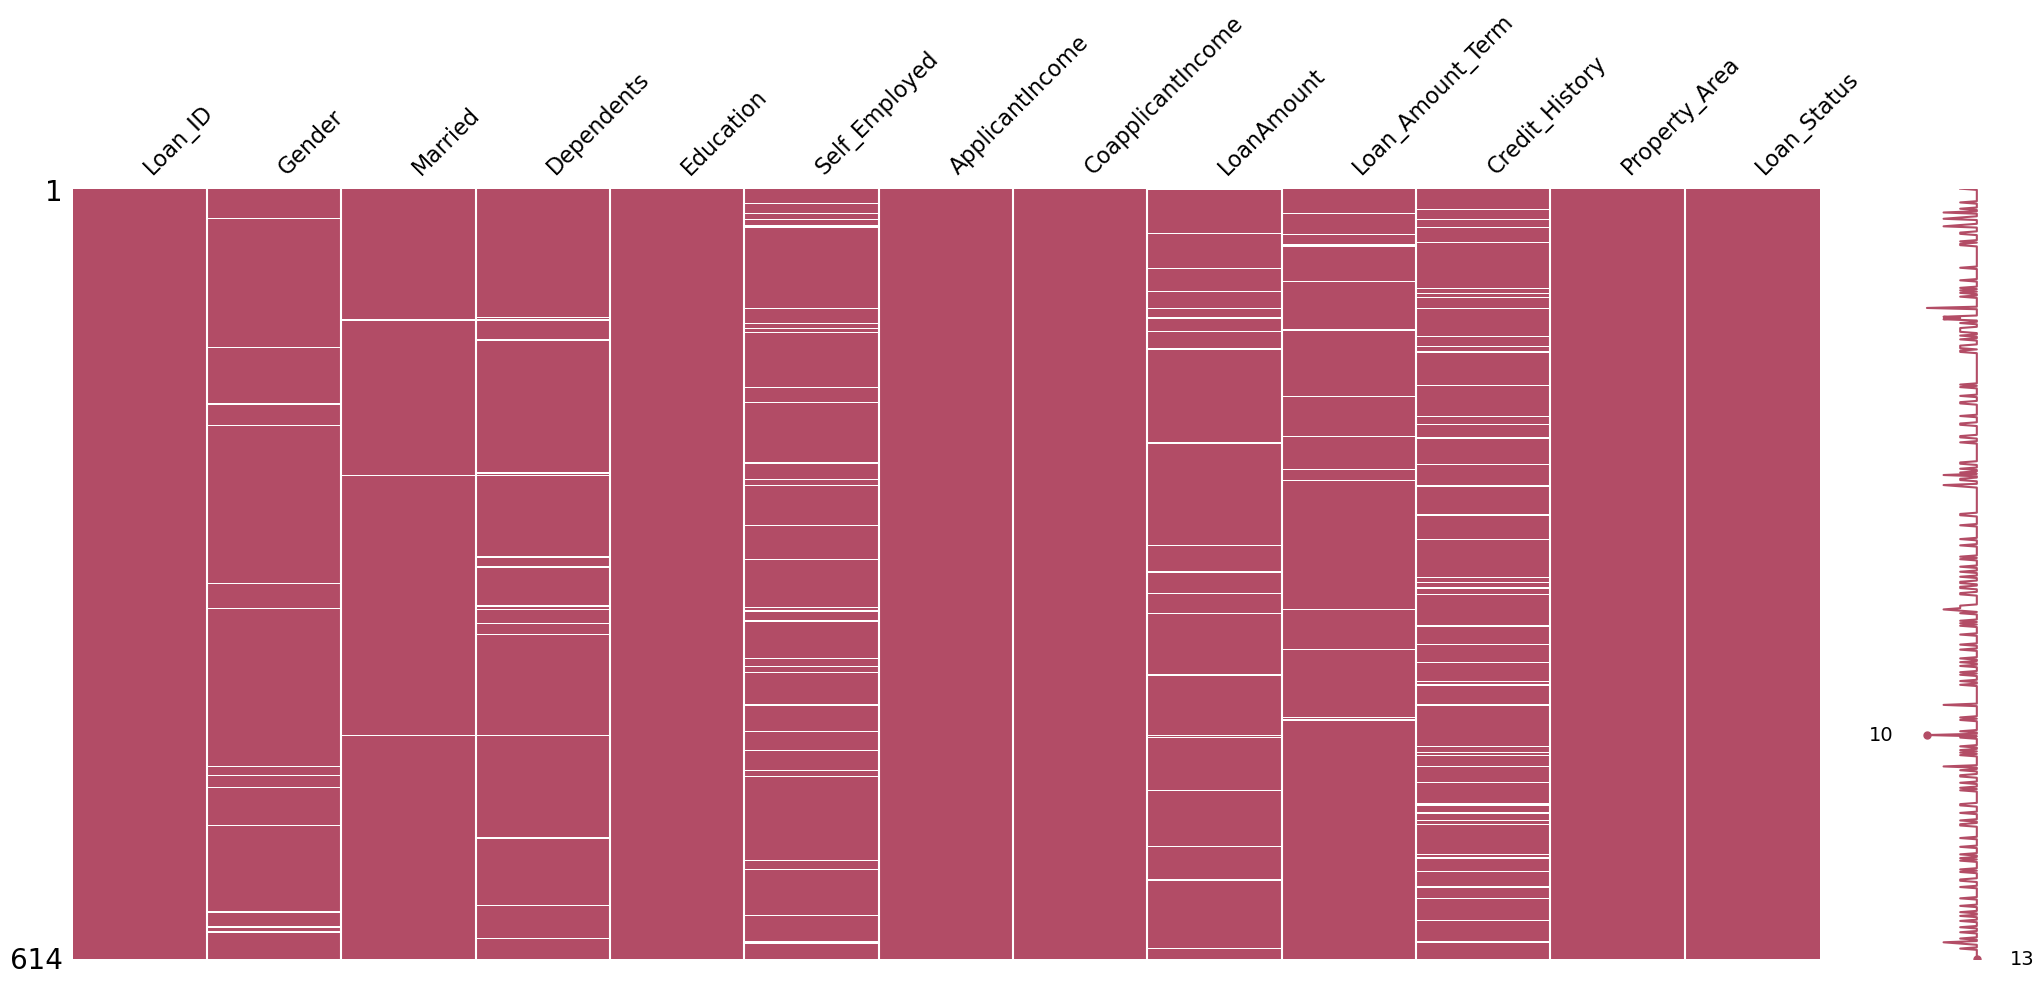

In [18]:
msno.matrix(train,color=(0.7,0.3,0.4))

In [19]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [20]:
print (train.Gender.value_counts(dropna=False) , "\n")
print (train.Married.value_counts(dropna=False),"\n")
print (train.Dependents.value_counts(dropna=False),"\n")
print (train.Education.value_counts(dropna=False),"\n")

Male      489
Female    112
NaN        13
Name: Gender, dtype: int64 

Yes    398
No     213
NaN      3
Name: Married, dtype: int64 

0      345
1      102
2      101
3+      51
NaN     15
Name: Dependents, dtype: int64 

Graduate        480
Not Graduate    134
Name: Education, dtype: int64 



In [21]:
print (train.Self_Employed.value_counts(dropna=False),"\n")
print (train.ApplicantIncome.value_counts(dropna=False),"\n")
print (train.CoapplicantIncome.value_counts(dropna=False),"\n")
print (train.LoanAmount.value_counts(dropna=False),"\n")
print (train.Loan_Amount_Term.value_counts(dropna=False),"\n")

No     500
Yes     82
NaN     32
Name: Self_Employed, dtype: int64 

2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64 

0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64 

NaN      22
120.0    20
110.0    17
100.0    15
160.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 204, dtype: int64 

360.0    512
180.0     44
480.0     15
NaN       14
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64 



In [22]:
print (train.Credit_History.value_counts(dropna=False),"\n")
print (train.Property_Area.value_counts(dropna=False),"\n")
print (train.Loan_Status.value_counts(dropna=False),"\n")

1.0    475
0.0     89
NaN     50
Name: Credit_History, dtype: int64 

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64 

Y    422
N    192
Name: Loan_Status, dtype: int64 



We don't have any inconsistent data or any Null values in other forms for example ('?' -> NaN)

<h3>III. Data Preparation </h3>

<h4> 1. Handling Missing Values </h4>

Gender

In [23]:
train.Gender.value_counts(dropna=False)

Male      489
Female    112
NaN        13
Name: Gender, dtype: int64

In [24]:
train.Gender.fillna(train.Gender.mode()[0],inplace= True)
train.Gender.isnull().sum()

0

Married

In [25]:
train.Married.value_counts(dropna=False)

Yes    398
No     213
NaN      3
Name: Married, dtype: int64

In [26]:
train.Married.fillna(train.Married.mode()[0],inplace=True)
train.Married.isnull().sum()

0

Dependents

In [27]:
print("Before Imputation" , "\n" , train.Dependents.value_counts(dropna=False))
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=1)
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder() 
train2=train.copy()
train2["Credit_History"]=lb.fit_transform(train["Credit_History"])
train2["Education"]=lb.fit_transform(train["Education"])
train2["Gender"]=lb.fit_transform(train["Gender"])
train2["Married"]=lb.fit_transform(train["Married"])
train2["Property_Area"]=lb.fit_transform(train["Property_Area"])
train2["Self_Employed"]=lb.fit_transform(train["Self_Employed"])
train2.Dependents=train2.Dependents.replace("3+",int(3))
train2=train2.drop(["Loan_ID","Loan_Status"],axis=1)
train2[train2["Dependents"].isnull()]
train.Dependents=imputer.fit_transform(X=train2,y=train2.Dependents)[:,2]
print("After Imputation" ,"\n" ,train.Dependents.value_counts(dropna=False))

Before Imputation 
 0      345
1      102
2      101
3+      51
NaN     15
Name: Dependents, dtype: int64


After Imputation 
 0.0    353
1.0    107
2.0    102
3.0     52
Name: Dependents, dtype: int64


Self_Employed

In [28]:
train.Self_Employed.value_counts(dropna=False)

No     500
Yes     82
NaN     32
Name: Self_Employed, dtype: int64

In [29]:
train.Self_Employed.fillna(train.Self_Employed.mode()[0],inplace=True)
train.Self_Employed.isnull().sum()

0

Credit_History

In [30]:
train.Credit_History.value_counts(dropna=False)

1.0    475
0.0     89
NaN     50
Name: Credit_History, dtype: int64

In [31]:
train.Credit_History.fillna(train.Credit_History.median(),inplace=True)
train.Credit_History.value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

Loan_Amount_Term

In [32]:
train.Loan_Amount_Term.value_counts(dropna=False)

360.0    512
180.0     44
480.0     15
NaN       14
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [33]:
train.Loan_Amount_Term.interpolate(inplace=True)
train.Loan_Amount_Term.value_counts(dropna=False)

360.0    521
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
270.0      3
60.0       2
36.0       2
330.0      1
420.0      1
12.0       1
Name: Loan_Amount_Term, dtype: int64

LoanAmount

In [34]:
train.LoanAmount.value_counts(dropna=False)

NaN      22
120.0    20
110.0    17
100.0    15
160.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 204, dtype: int64

In [35]:
LoanAmountMissing = train[train['LoanAmount'].isnull()]
LoanAmountnotMissing = train[~train['LoanAmount'].isnull()]
X=LoanAmountnotMissing["ApplicantIncome"]
Y=LoanAmountnotMissing["LoanAmount"]

In [36]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X.values.reshape(-1,1),Y)
y_missing = reg.predict(LoanAmountMissing["ApplicantIncome"].values.reshape(-1,1))
y_missing

array([149.93726483, 121.6061837 , 142.77126109, 122.55742313,
       157.33315142, 211.775755  , 140.44865148, 162.63631126,
       134.21010619, 135.21683459, 267.39948088, 119.42626   ,
       132.11737944, 118.0786708 , 127.43252523, 183.21479101,
       121.11470999, 126.93312452, 140.67060734, 156.15202913,
       123.32634167, 122.59705811])

In [37]:
j=0
for i in train["LoanAmount"][train['LoanAmount'].isnull()].index :
    train.loc[i,"LoanAmount"]=y_missing[j]
    j+=1

In [38]:
#train.LoanAmount.interpolate(inplace=True)
#train.LoanAmount.isnull().sum()
#train.LoanAmount.fillna(method="bfill",inplace=True)
#train.LoanAmount.isnull().sum()

In [39]:
train.isnull().sum().sum()

0

#### 2. Dealing with Outliers

<AxesSubplot: ylabel='CoapplicantIncome'>

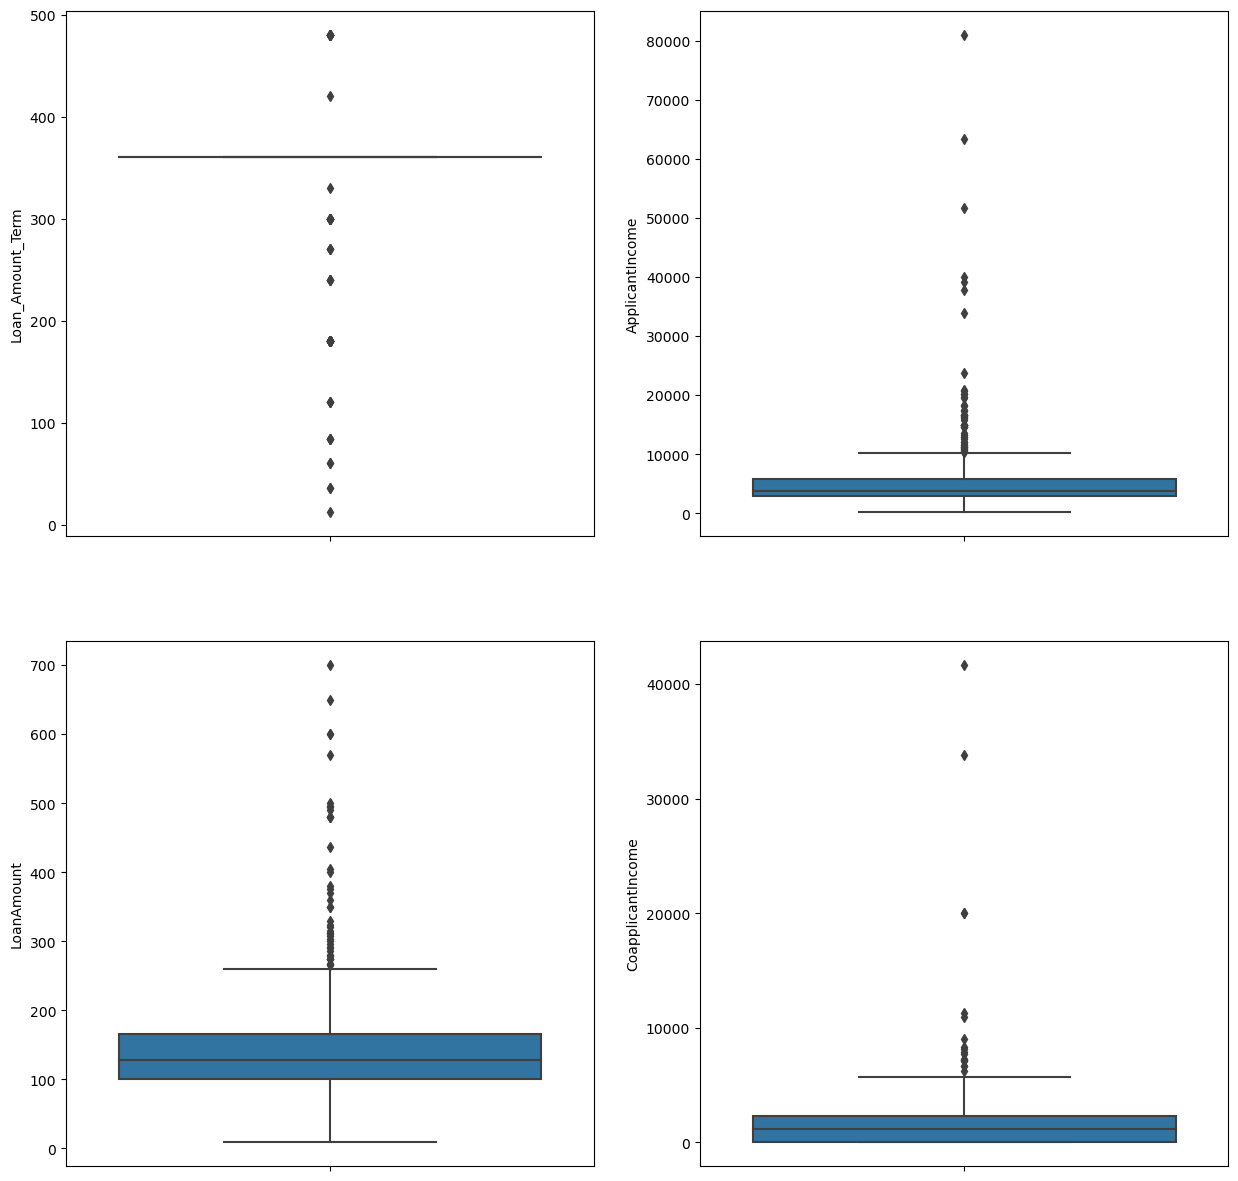

In [40]:
f, axes = plt.subplots(2, 2,figsize=(15,15))
sns.boxplot(data=train, y="Loan_Amount_Term" , orient='v' , ax=axes[0][0])
sns.boxplot(data=train, y="LoanAmount" , orient='v' , ax=axes[1][0])
sns.boxplot(data=train, y="ApplicantIncome" , orient='v' , ax=axes[0][1])
sns.boxplot(data=train, y="CoapplicantIncome" , orient='v' , ax=axes[1][1])

In [41]:
test.isnull().sum()
#Gender
test.Gender.value_counts(dropna=False)
test.Gender.fillna(test.Gender.mode()[0],inplace= True)
test.Gender.isnull().sum()
#Married
test.Married.value_counts(dropna=False)
test.Married.fillna(test.Married.mode()[0],inplace=True)
test.Married.isnull().sum()
#Dependents
imputer = KNNImputer(n_neighbors=1)

lb = LabelEncoder() 
test2=test.copy()
test2["Credit_History"]=lb.fit_transform(test["Credit_History"])
test2["Education"]=lb.fit_transform(test["Education"])
test2["Gender"]=lb.fit_transform(test["Gender"])
test2["Married"]=lb.fit_transform(test["Married"])
test2["Property_Area"]=lb.fit_transform(test["Property_Area"])
test2["Self_Employed"]=lb.fit_transform(test["Self_Employed"])
test2.Dependents=test2.Dependents.replace("3+",int(3))
test2=test2.drop(["Loan_ID"],axis=1)
test2[test2["Dependents"].isnull()]
test.Dependents=imputer.fit_transform(X=test2,y=test2.Dependents)[:,2]
#Self_Employed
test.Self_Employed.value_counts(dropna=False)
test.Self_Employed.fillna(test.Self_Employed.mode()[0],inplace=True)
test.Self_Employed.isnull().sum()
#Credit_History
test.Credit_History.value_counts(dropna=False)
test.Credit_History.fillna(test.Credit_History.median(),inplace=True)
test.Credit_History.value_counts()
#Loan_Amount_Term
test.Loan_Amount_Term.value_counts(dropna=False)
test.Loan_Amount_Term.interpolate(inplace=True)
test.Loan_Amount_Term.value_counts(dropna=False)
#LoanAmount
test.LoanAmount.value_counts(dropna=False)
LoanAmountMissing = test[test['LoanAmount'].isnull()]
LoanAmountnotMissing = test[~test['LoanAmount'].isnull()]
X=LoanAmountnotMissing["ApplicantIncome"]
Y=LoanAmountnotMissing["LoanAmount"]
reg = LinearRegression()
reg.fit(X.values.reshape(-1,1),Y)
y_missing = reg.predict(LoanAmountMissing["ApplicantIncome"].values.reshape(-1,1))
y_missing
j=0
for i in test["LoanAmount"][test['LoanAmount'].isnull()].index :
    test.loc[i,"LoanAmount"]=y_missing[j]
    j+=1
print(train.isnull().sum().sum())

0


<h3>IV. Modeling </h3>

### 1. Splitting into X and Y (Training)

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, roc_curve, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [43]:
Y=train["Loan_Status"]
X=train.drop("Loan_Status",axis=1)

In [44]:
X=X.drop('Loan_ID',axis=1)

In [45]:
lb = LabelEncoder() 
X["Gender"]=lb.fit_transform(X["Gender"])
X["Married"]=lb.fit_transform(X["Married"])
X["Education"]=lb.fit_transform(X["Education"])
X["Self_Employed"]=lb.fit_transform(X["Self_Employed"])
X["Credit_History"]=lb.fit_transform(X["Credit_History"])
X["Property_Area"]=lb.fit_transform(X["Property_Area"])

In [46]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0.0,0,0,5849,0.0,149.937265,360.0,1,2
1,1,1,1.0,0,0,4583,1508.0,128.000000,360.0,1,0
2,1,1,0.0,0,1,3000,0.0,66.000000,360.0,1,2
3,1,1,0.0,1,0,2583,2358.0,120.000000,360.0,1,2
4,1,0,0.0,0,0,6000,0.0,141.000000,360.0,1,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0.0,0,0,2900,0.0,71.000000,360.0,1,0
610,1,1,3.0,0,0,4106,0.0,40.000000,180.0,1,0
611,1,1,1.0,0,0,8072,240.0,253.000000,360.0,1,2
612,1,1,2.0,0,0,7583,0.0,187.000000,360.0,1,2


In [47]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) #Standardize the Data -> Feature Scaling

In [48]:
X_scaled

array([[ 0.47234264, -1.37208932, -0.75217674, ...,  0.27819762,
         0.41173269,  1.22329839],
       [ 0.47234264,  0.72881553,  0.23676655, ...,  0.27819762,
         0.41173269, -1.31851281],
       [ 0.47234264,  0.72881553, -0.75217674, ...,  0.27819762,
         0.41173269,  1.22329839],
       ...,
       [ 0.47234264,  0.72881553,  0.23676655, ...,  0.27819762,
         0.41173269,  1.22329839],
       [ 0.47234264,  0.72881553,  1.22570985, ...,  0.27819762,
         0.41173269,  1.22329839],
       [-2.11710719, -1.37208932, -0.75217674, ...,  0.27819762,
        -2.42876026, -0.04760721]])

### 2. K-Nearest Neighbor

In [275]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3) #Create a KneighborsClassifier with 3 neighbors to consider 

In [277]:
knn.fit(X_scaled,test)  #fit the knn to the scaled data as it uses distance

ValueError: Found input variables with inconsistent numbers of samples: [614, 367]

In [ ]:
y_pred_knn = knn.predict(xtest_sc) #predict the Y of the test data

Text(0, 0.5, 'True Positive rate')

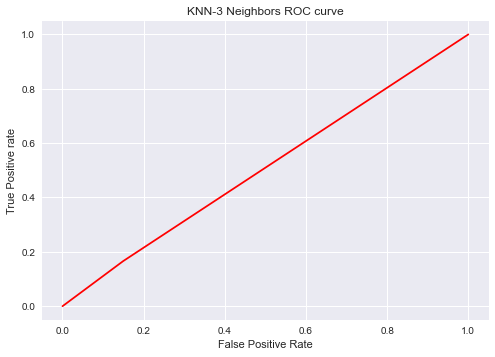

In [ ]:
# ROC Curve
fpr, tpr, thresh = roc_curve(ytest, y_pred_knn, pos_label=1)
plt.plot(fpr, tpr, color='red', label='KNN-3 Neighbors')
plt.style.use('seaborn-deep')
plt.title('KNN-3 Neighbors ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')


In [1]:
xd="""Mediator Administrative Services
Investment in Tunisia

Agricultural Investment Promotion Agency (APIA)
Exports Promotion Center (CEPEX)
Industry Promotion Agency (API)
The Forign Investment Promotion Agency (FIPA)
Tunisian Industry Portal
Electronic Payment

Paying bills by Internet (La Poste)
Payment by Internet (Electricity)
Payment by Internet (Water)
Télédéclaration e-impôt
Education and training

Services of Formation and Training
Tunisian Educational Portal
Tunisian Virtual School
Virtual University
Information Technology and Communication

http://www.ati.tn/
Information and communication technologies in Tunisia
National Agency for Computer Security (ANSI)
National Digital Certification (ANCE)
Tunisian post
Tunisie telecoms
Finances

Central Bank of Tunisia
Portal of Ministry of Finance
Tunisie TradeNet : Guichet Unique Eléctronique du Commerce Extérieur
Employment

Employment in Tunisia
National Employment Agency and Self Employment (ANETI)
Tunisia skills
Health and Social Affairs

Health Portal
National Health Insurence Fund (CNAM)
Social Portal
Transport

Agency Technical Land Transport (ATTT)
Merchand Marine and Ports Office (OMMP)
Office for Civil Aviation and Airports (OACA)
Société Nationale des Chemins de Fer Tunisiens (SNCFT)
Tunisair
Tunisian Navigation Company (CTN)"""